**Quantum Computing Project: Random States, Entanglement, and Noise**

In [10]:
!pip install qiskit qiskit-aer numpy matplotlib seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, partial_trace, entropy, DensityMatrix
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 80)
print(" QUANTUM COMPUTING PROJECT - INITIALIZATION ".center(80))
print("=" * 80)
print("\n✓ All libraries imported successfully!")
print("✓ Random seed set to 42 for reproducibility")
print("✓ Visualization settings configured\n")


                   QUANTUM COMPUTING PROJECT - INITIALIZATION                   

✓ All libraries imported successfully!
✓ Random seed set to 42 for reproducibility
✓ Visualization settings configured



# Part 1: Quantum State Fingerprinting (Swap Test)

**Objective:** Measure similarity between quantum states.

**Method:**  
- Generate three random 2-qubit states.  
- Use the **swap test protocol** with an ancilla qubit to compute pairwise overlaps.

**Key Formula (Swap Test Overlap):**

$$
|\langle \psi_1 | \psi_2 \rangle|^2 = 2 \, P(|0\rangle_\text{ancilla}) - 1
$$

Where:  
- $$P(|0\rangle_\text{ancilla})$$ is the probability of the ancilla qubit being measured in the $$|0\rangle$$ state.  
- The diagonal of the similarity matrix is always 1 (state overlaps with itself).  
- Off-diagonal elements represent the overlap between different states.

**Outputs:**  
- Pairwise similarity matrix between the states.  
- Heatmap visualization showing the overlaps.  

**Interpretation:**  
- A value of 1 indicates identical states.  
- Values closer to 0 indicate highly dissimilar states.


                PART 1: QUANTUM STATE FINGERPRINTING (SWAP TEST)                

Objective: Measure similarity between different 2-qubit quantum states
Method: Swap Test Protocol with ancilla qubit

Step 1: Generating random quantum states...
✓ Generated 3 random 2-qubit states

Step 2: Computing pairwise overlaps using swap test...
  Overlap(ψ₁, ψ₁): 1.000 (identical)
  Overlap(ψ₁, ψ₂): 0.355
  Overlap(ψ₁, ψ₃): 0.419
  Overlap(ψ₂, ψ₂): 1.000 (identical)
  Overlap(ψ₂, ψ₃): 0.202
  Overlap(ψ₃, ψ₃): 1.000 (identical)

Step 3: Creating visualization...
✓ Saved figure: 1_similarity_matrix.png


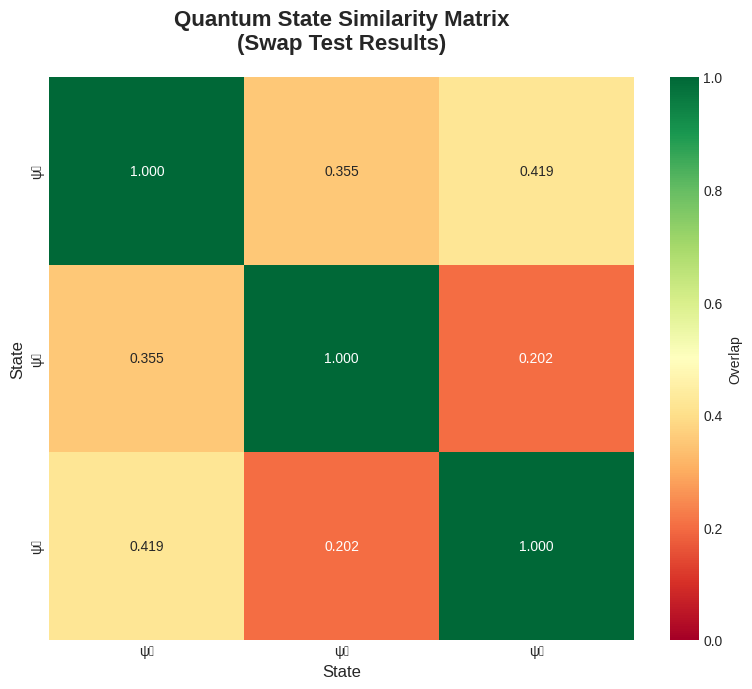


✓ Part 1 Complete: Similarity matrix computed successfully!
  - Diagonal elements = 1.0 (states identical to themselves)
  - Off-diagonal range: [0.355, 0.202]


In [3]:
print("=" * 80)
print(" PART 1: QUANTUM STATE FINGERPRINTING (SWAP TEST) ".center(80))
print("=" * 80)
print("\nObjective: Measure similarity between different 2-qubit quantum states")
print("Method: Swap Test Protocol with ancilla qubit\n")

def create_random_2qubit_state():
    """
    Create a random normalized 2-qubit state

    Returns:
        Statevector: A normalized quantum state in 4-dimensional Hilbert space
    """
    # Generate random complex amplitudes
    real_part = np.random.randn(4)
    imag_part = np.random.randn(4)
    state = real_part + 1j * imag_part

    # Normalize to unit vector
    state = state / np.linalg.norm(state)

    return Statevector(state)

def swap_test_circuit(state1, state2):
    """
    Create a swap test circuit to measure overlap between two quantum states

    Circuit structure:
    q0 (ancilla): |0⟩ --H-- • --H-- Measure
                           |
    q1-q2: |ψ₁⟩ ---------- × --------
                           |
    q3-q4: |ψ₂⟩ ---------- × --------

    Args:
        state1: First quantum state (Statevector)
        state2: Second quantum state (Statevector)

    Returns:
        QuantumCircuit: Swap test circuit
    """
    # Create quantum circuit with 5 qubits and 1 classical bit
    qr = QuantumRegister(5, 'q')
    cr = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(qr, cr)

    # Initialize states on separate qubit pairs
    qc.initialize(state1.data, [qr[1], qr[2]])
    qc.initialize(state2.data, [qr[3], qr[4]])

    # Swap test protocol
    qc.h(qr[0])  # Hadamard on ancilla - create superposition

    # Controlled SWAP between corresponding qubits of both states
    qc.cswap(qr[0], qr[1], qr[3])  # CSWAP first qubit of each state
    qc.cswap(qr[0], qr[2], qr[4])  # CSWAP second qubit of each state

    qc.h(qr[0])  # Hadamard on ancilla - interference step

    # Measure ancilla qubit
    qc.measure(qr[0], cr[0])

    return qc

def compute_overlap(state1, state2, shots=8192):
    """
    Compute overlap (similarity) between two quantum states using swap test

    Formula: |⟨ψ₁|ψ₂⟩|² = 2*P(|0⟩) - 1

    Args:
        state1: First quantum state
        state2: Second quantum state
        shots: Number of measurement repetitions

    Returns:
        float: Overlap value between 0 and 1
    """
    qc = swap_test_circuit(state1, state2)

    # Run simulation
    simulator = AerSimulator()
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Calculate probability of measuring |0⟩ on ancilla
    p0 = counts.get('0', 0) / shots

    # Apply swap test formula
    overlap = 2 * p0 - 1

    # Handle numerical errors (overlap should be between 0 and 1)
    return max(0.0, min(1.0, overlap))

# Generate three random 2-qubit states
print("Step 1: Generating random quantum states...")
states = [create_random_2qubit_state() for _ in range(3)]
state_labels = ['ψ₁', 'ψ₂', 'ψ₃']
print(f"✓ Generated {len(states)} random 2-qubit states\n")

# Compute pairwise similarity matrix
print("Step 2: Computing pairwise overlaps using swap test...")
n_states = len(states)
similarity_matrix = np.zeros((n_states, n_states))

for i in range(n_states):
    for j in range(n_states):
        if i == j:
            # Same state always has overlap = 1
            similarity_matrix[i][j] = 1.0
            print(f"  Overlap({state_labels[i]}, {state_labels[j]}): 1.000 (identical)")
        elif i < j:
            # Compute overlap only once (matrix is symmetric)
            overlap = compute_overlap(states[i], states[j])
            similarity_matrix[i][j] = overlap
            similarity_matrix[j][i] = overlap
            print(f"  Overlap({state_labels[i]}, {state_labels[j]}): {overlap:.3f}")

# Visualize similarity matrix
print("\nStep 3: Creating visualization...")
plt.figure(figsize=(8, 7))
sns.heatmap(similarity_matrix, annot=True, fmt='.3f',
            xticklabels=state_labels, yticklabels=state_labels,
            cmap='RdYlGn', vmin=0, vmax=1, cbar_kws={'label': 'Overlap'})
plt.title('Quantum State Similarity Matrix\n(Swap Test Results)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('State', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig('1_similarity_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Saved figure: 1_similarity_matrix.png")
plt.show()

print("\n✓ Part 1 Complete: Similarity matrix computed successfully!")
print(f"  - Diagonal elements = 1.0 (states identical to themselves)")
print(f"  - Off-diagonal range: [{similarity_matrix[0,1]:.3f}, {similarity_matrix[1,2]:.3f}]")


# Part 2: Entanglement Entropy vs Rotation Angle

**Objective:** Analyze how entanglement changes with rotation parameter $\gamma$.

**State Definition:**  
We consider a partially entangled 2-qubit state:

$\displaystyle |\psi(\gamma)\rangle = \cos\Big(\frac{\gamma}{2}\Big)|00\rangle + \sin\Big(\frac{\gamma}{2}\Big)|11\rangle$

Where:  
- $\gamma = 0 \Rightarrow |\psi\rangle = |00\rangle$ (separable)  
- $\gamma = \pi/2 \Rightarrow |\psi\rangle = (|00\rangle + |11\rangle)/\sqrt{2}$ (maximally entangled)  
- $\gamma = \pi \Rightarrow |\psi\rangle = |11\rangle$ (separable)  

**Entanglement Quantification:**  
The entanglement of a single qubit with the other is measured using the **von Neumann entropy**:

$\displaystyle S(\rho_A) = - \mathrm{Tr}(\rho_A \log_2 \rho_A)$

Where $\rho_A$ is the reduced density matrix of qubit A obtained by tracing out qubit B:

$\displaystyle \rho_A = \mathrm{Tr}_B(|\psi(\gamma)\rangle \langle \psi(\gamma)|)$

Interpretation:  
- $S = 0$ → No entanglement (pure separable state)  
- $S = 1$ → Maximum entanglement (Bell state)

**Procedure:**  
1. Scan $\gamma$ from $0$ to $2\pi$.  
2. Compute entanglement entropy $S$ for each $\gamma$.  
3. Plot $S$ vs $\gamma$ to visualize entanglement evolution.

**Observations:**  
- Entropy peaks at $\gamma = \pi/2, 3\pi/2$ → maximally entangled states  
- Entropy is zero at $\gamma = 0, \pi, 2\pi$ → separable states  
- Variation is sinusoidal, showing smooth entanglement change.



                 PART 2: ENTANGLEMENT ENTROPY vs ROTATION ANGLE                 

Objective: Analyze how entanglement changes with rotation parameter γ
State form: cos(γ/2)|00⟩ + sin(γ/2)|11⟩

Step 1: Scanning rotation angles from 0 to 2π...
✓ Computed entropy for 100 rotation angles

Step 2: Analyzing results...
  Maximum entropy: 0.9998 (near γ = π/2, 3π/2)
  Minimum entropy: 0.0000 (near γ = 0, π, 2π)
  Interpretation: Entropy peaks at maximally entangled states
  First maximum at: γ ≈ 1.587 rad (90.9°)

Step 3: Creating visualization...
✓ Saved figure: 2_entanglement_entropy.png


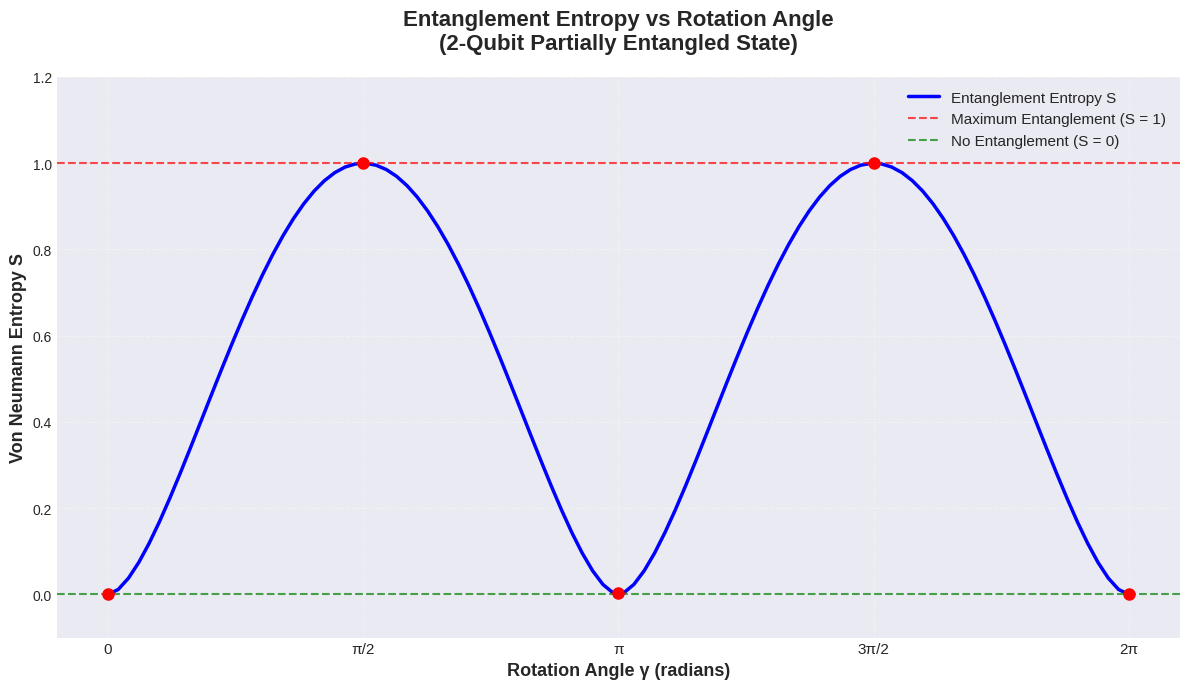


✓ Part 2 Complete: Entropy shows sinusoidal behavior!
  - Peaks at γ = π/2, 3π/2 (maximally entangled Bell-like states)
  - Zeros at γ = 0, π, 2π (separable product states)


In [4]:
print("\n" + "=" * 80)
print(" PART 2: ENTANGLEMENT ENTROPY vs ROTATION ANGLE ".center(80))
print("=" * 80)
print("\nObjective: Analyze how entanglement changes with rotation parameter γ")
print("State form: cos(γ/2)|00⟩ + sin(γ/2)|11⟩\n")

def create_entangled_state(gamma):
    """
    Create a partially entangled 2-qubit state with rotation parameter gamma

    State: cos(γ/2)|00⟩ + sin(γ/2)|11⟩
    - γ = 0: |00⟩ (separable)
    - γ = π/2: (|00⟩ + |11⟩)/√2 (maximally entangled, Bell state)
    - γ = π: |11⟩ (separable)

    Args:
        gamma: Rotation angle in radians

    Returns:
        Statevector: Entangled quantum state
    """
    qc = QuantumCircuit(2)
    qc.ry(gamma, 0)  # Rotation around Y-axis
    qc.cx(0, 1)      # CNOT to create entanglement
    return Statevector(qc)

def compute_entanglement_entropy(state):
    """
    Compute von Neumann entropy of reduced density matrix

    S = -Tr(ρ log₂ ρ)
    - S = 0: No entanglement (pure state)
    - S = 1: Maximum entanglement for 2-qubit system

    Args:
        state: Quantum state (Statevector)

    Returns:
        float: Entanglement entropy (0 to 1)
    """
    # Convert to density matrix
    rho = DensityMatrix(state)

    # Trace out second qubit to get reduced density matrix
    rho_reduced = partial_trace(rho, [1])

    # Compute von Neumann entropy (base 2 for qubits)
    S = entropy(rho_reduced, base=2)

    return S

# Scan rotation angles from 0 to 2π
print("Step 1: Scanning rotation angles from 0 to 2π...")
gammas = np.linspace(0, 2*np.pi, 100)
entropies = []

for gamma in gammas:
    state = create_entangled_state(gamma)
    S = compute_entanglement_entropy(state)
    entropies.append(S)

print(f"✓ Computed entropy for {len(gammas)} rotation angles")
print(f"\nStep 2: Analyzing results...")
print(f"  Maximum entropy: {max(entropies):.4f} (near γ = π/2, 3π/2)")
print(f"  Minimum entropy: {min(entropies):.4f} (near γ = 0, π, 2π)")
print(f"  Interpretation: Entropy peaks at maximally entangled states")

# Find angles of maximum entanglement
max_entropy_idx = np.argmax(entropies)
max_entropy_angle = gammas[max_entropy_idx]
print(f"  First maximum at: γ ≈ {max_entropy_angle:.3f} rad ({np.degrees(max_entropy_angle):.1f}°)")

# Create visualization
print("\nStep 3: Creating visualization...")
plt.figure(figsize=(12, 7))
plt.plot(gammas, entropies, 'b-', linewidth=2.5, label='Entanglement Entropy S')
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=1.5, alpha=0.7,
            label='Maximum Entanglement (S = 1)')
plt.axhline(y=0.0, color='g', linestyle='--', linewidth=1.5, alpha=0.7,
            label='No Entanglement (S = 0)')

# Mark special points
special_angles = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
for angle in special_angles:
    idx = np.argmin(np.abs(gammas - angle))
    plt.plot(angle, entropies[idx], 'ro', markersize=8)

plt.xlabel('Rotation Angle γ (radians)', fontsize=13, fontweight='bold')
plt.ylabel('Von Neumann Entropy S', fontsize=13, fontweight='bold')
plt.title('Entanglement Entropy vs Rotation Angle\n(2-Qubit Partially Entangled State)',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'], fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')
plt.ylim(-0.1, 1.2)
plt.tight_layout()
plt.savefig('2_entanglement_entropy.png', dpi=300, bbox_inches='tight')
print("✓ Saved figure: 2_entanglement_entropy.png")
plt.show()

print("\n✓ Part 2 Complete: Entropy shows sinusoidal behavior!")
print("  - Peaks at γ = π/2, 3π/2 (maximally entangled Bell-like states)")
print("  - Zeros at γ = 0, π, 2π (separable product states)")


# Part 3: Bloch Sphere Visualization

**Objective:** Visualize the reduced single-qubit states on the Bloch sphere.

**Method:**  
1. For a 2-qubit state $|\psi(\gamma)\rangle$, trace out the second qubit to get the reduced density matrix of the first qubit:

$\displaystyle \rho_1 = \mathrm{Tr}_2(|\psi(\gamma)\rangle \langle \psi(\gamma)|)$

2. Compute the **Bloch vector components**:

$\displaystyle x = \mathrm{Tr}(\rho_1 \sigma_x), \quad y = \mathrm{Tr}(\rho_1 \sigma_y), \quad z = \mathrm{Tr}(\rho_1 \sigma_z)$

where $\sigma_x, \sigma_y, \sigma_z$ are the Pauli matrices:

$\displaystyle \sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
\sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$

3. The Bloch vector magnitude indicates the purity of the qubit:

$\displaystyle |\vec{r}| = \sqrt{x^2 + y^2 + z^2}$

- $|\vec{r}| = 1$ → Pure state (on surface of Bloch sphere)  
- $|\vec{r}| < 1$ → Mixed state (inside Bloch sphere)

**Procedure:**  
- Compute Bloch vectors for selected angles $\gamma = 0, \pi/4, \pi/2, 3\pi/4, \pi$.  
- Plot vectors on a 3D Bloch sphere for each $\gamma$.  

**Observations:**  
- As $\gamma$ changes, the Bloch vector rotates and its magnitude changes.  
- For maximally entangled states (e.g., $\gamma = \pi/2$), the reduced qubit is **mixed**, so $|\vec{r}| < 1$.  
- For separable states (e.g., $\gamma = 0$ or $\pi$), the reduced qubit is **pure**, so $|\vec{r}| = 1$.  

**Conclusion:**  
The Bloch sphere provides an intuitive geometric view of how the reduced qubit's state evolves with entanglement.



                       PART 3: BLOCH SPHERE VISUALIZATION                       

Objective: Visualize reduced single-qubit states on Bloch sphere
Method: Trace out second qubit and compute Bloch vector

Step 1: Computing Bloch vectors for different rotation angles...
  γ = 0.000: Bloch vector = (0.000, 0.000, 1.000), |r⃗| = 1.000
  γ = 0.785: Bloch vector = (0.000, 0.000, 0.707), |r⃗| = 0.707
  γ = 1.571: Bloch vector = (0.000, 0.000, 0.000), |r⃗| = 0.000
  γ = 2.356: Bloch vector = (0.000, 0.000, -0.707), |r⃗| = 0.707
  γ = 3.142: Bloch vector = (0.000, 0.000, -1.000), |r⃗| = 1.000

Step 2: Creating 3D visualization...
✓ Saved figure: 3_bloch_sphere.png


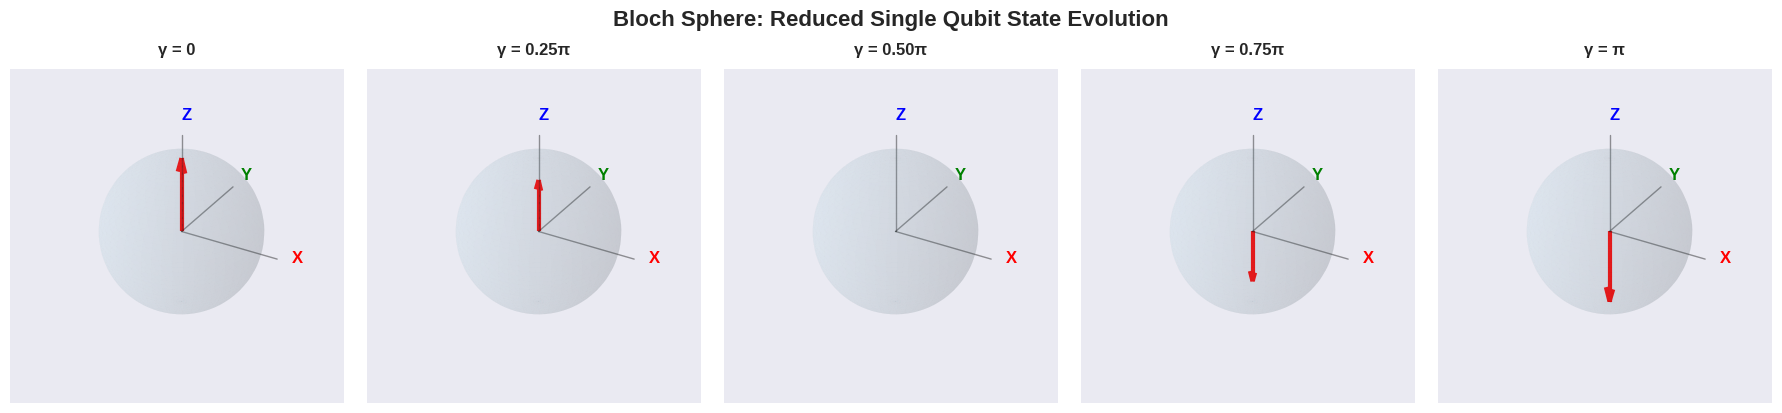


✓ Part 3 Complete: Bloch vectors show state evolution!
  - Pure entangled states → Mixed reduced states (|r⃗| < 1)
  - Vector rotates and changes magnitude with γ


In [5]:
print("\n" + "=" * 80)
print(" PART 3: BLOCH SPHERE VISUALIZATION ".center(80))
print("=" * 80)
print("\nObjective: Visualize reduced single-qubit states on Bloch sphere")
print("Method: Trace out second qubit and compute Bloch vector\n")

def bloch_vector(state):
    """
    Compute Bloch vector coordinates (x, y, z) for a single qubit reduced state

    Bloch vector: r⃗ = (⟨σₓ⟩, ⟨σᵧ⟩, ⟨σᵤ⟩)
    - Pure states: |r⃗| = 1 (on sphere surface)
    - Mixed states: |r⃗| < 1 (inside sphere)

    Args:
        state: 2-qubit quantum state

    Returns:
        tuple: (x, y, z) Bloch vector coordinates
    """
    # Get density matrix and trace out second qubit
    rho = DensityMatrix(state)
    rho_reduced = partial_trace(rho, [1])

    # Pauli matrices
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])

    # Compute expectation values ⟨σᵢ⟩ = Tr(ρ σᵢ)
    rho_matrix = rho_reduced.data
    x = np.real(np.trace(rho_matrix @ sigma_x))
    y = np.real(np.trace(rho_matrix @ sigma_y))
    z = np.real(np.trace(rho_matrix @ sigma_z))

    return x, y, z

def draw_bloch_sphere(ax):
    """Draw a semi-transparent Bloch sphere"""
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.1, color='lightblue')

def draw_axes(ax):
    """Draw coordinate axes on Bloch sphere"""
    # X, Y, Z axes
    ax.plot([0, 1.3], [0, 0], [0, 0], 'k-', alpha=0.4, linewidth=1)
    ax.plot([0, 0], [0, 1.3], [0, 0], 'k-', alpha=0.4, linewidth=1)
    ax.plot([0, 0], [0, 0], [0, 1.3], 'k-', alpha=0.4, linewidth=1)

    # Labels
    ax.text(1.5, 0, 0, 'X', fontsize=12, fontweight='bold', color='red')
    ax.text(0, 1.5, 0, 'Y', fontsize=12, fontweight='bold', color='green')
    ax.text(0, 0, 1.5, 'Z', fontsize=12, fontweight='bold', color='blue')

# Sample rotation angles for visualization
print("Step 1: Computing Bloch vectors for different rotation angles...")
sample_gammas = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
bloch_vectors = []

for gamma in sample_gammas:
    state = create_entangled_state(gamma)
    x, y, z = bloch_vector(state)
    magnitude = np.sqrt(x**2 + y**2 + z**2)
    bloch_vectors.append((x, y, z))
    print(f"  γ = {gamma:.3f}: Bloch vector = ({x:.3f}, {y:.3f}, {z:.3f}), |r⃗| = {magnitude:.3f}")

print("\nStep 2: Creating 3D visualization...")
fig = plt.figure(figsize=(18, 4))

for idx, gamma in enumerate(sample_gammas):
    ax = fig.add_subplot(1, 5, idx+1, projection='3d')

    # Draw Bloch sphere
    draw_bloch_sphere(ax)
    draw_axes(ax)

    # Get and plot Bloch vector
    x, y, z = bloch_vectors[idx]
    magnitude = np.sqrt(x**2 + y**2 + z**2)

    # Draw state vector
    ax.quiver(0, 0, 0, x, y, z, color='red', arrow_length_ratio=0.2,
              linewidth=3, label=f'|r⃗| = {magnitude:.2f}')

    # Draw projection on XY plane
    ax.plot([x, x], [y, y], [0, z], 'r--', alpha=0.3, linewidth=1)

    # Settings
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_box_aspect([1,1,1])

    # Title with angle
    if gamma == 0:
        title = f'γ = 0'
    elif gamma == np.pi:
        title = f'γ = π'
    else:
        title = f'γ = {gamma/np.pi:.2f}π'
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)

    ax.axis('off')

plt.suptitle('Bloch Sphere: Reduced Single Qubit State Evolution',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('3_bloch_sphere.png', dpi=300, bbox_inches='tight')
print("✓ Saved figure: 3_bloch_sphere.png")
plt.show()

print("\n✓ Part 3 Complete: Bloch vectors show state evolution!")
print("  - Pure entangled states → Mixed reduced states (|r⃗| < 1)")
print("  - Vector rotates and changes magnitude with γ")


# Part 4: Probability Distribution in Computational Basis

**Objective:** Analyze the measurement probabilities of the 2-qubit state in the computational basis.

**Method:**  
1. Consider the 2-qubit partially entangled state:

$$
|\psi(\gamma)\rangle = \cos\frac{\gamma}{2} |00\rangle + \sin\frac{\gamma}{2} |11\rangle
$$

2. Compute **measurement probabilities** for the four computational basis states $|00\rangle, |01\rangle, |10\rangle, |11\rangle$:

$$
P(|00\rangle) = |\langle 00|\psi(\gamma)\rangle|^2 = \cos^2\frac{\gamma}{2}
$$

$$
P(|11\rangle) = |\langle 11|\psi(\gamma)\rangle|^2 = \sin^2\frac{\gamma}{2}
$$

$$
P(|01\rangle) = |\langle 01|\psi(\gamma)\rangle|^2 = 0, \quad
P(|10\rangle) = |\langle 10|\psi(\gamma)\rangle|^2 = 0
$$

3. Verify normalization:

$$
\sum_{i,j \in \{0,1\}} P(|ij\rangle) = 1
$$

**Procedure:**  
- Compute probabilities for selected $\gamma$ values: $0, \pi/4, \pi/2, \pi$.  
- Plot bar charts to visualize distribution over the computational basis.

**Observations:**  
- $\gamma = 0$ → All probability in $|00\rangle$ (separable).  
- $\gamma = \pi/2$ → Equal probability in $|00\rangle$ and $|11\rangle$ (maximally entangled Bell state).  
- $\gamma = \pi$ → All probability in $|11\rangle$ (separable).  

**Conclusion:**  
This analysis shows how the quantum state evolves and distributes its probability among computational basis states as $\gamma$ varies.



                        PART 4: PROBABILITY DISTRIBUTION                        

Objective: Analyze measurement probabilities in computational basis
Basis states: |00⟩, |01⟩, |10⟩, |11⟩

Step 1: Computing probability distributions...

  γ = 0.000 (0.00π):
    |00⟩: 1.0000
    |01⟩: 0.0000
    |10⟩: 0.0000
    |11⟩: 0.0000
    Sum: 1.0000 ✓

  γ = 0.785 (0.25π):
    |00⟩: 0.8536
    |01⟩: 0.0000
    |10⟩: 0.0000
    |11⟩: 0.1464
    Sum: 1.0000 ✓

  γ = 1.571 (0.50π):
    |00⟩: 0.5000
    |01⟩: 0.0000
    |10⟩: 0.0000
    |11⟩: 0.5000
    Sum: 1.0000 ✓

  γ = 3.142 (1.00π):
    |00⟩: 0.0000
    |01⟩: 0.0000
    |10⟩: 0.0000
    |11⟩: 1.0000
    Sum: 1.0000 ✓

✓ Saved figure: 4_probability_distribution.png


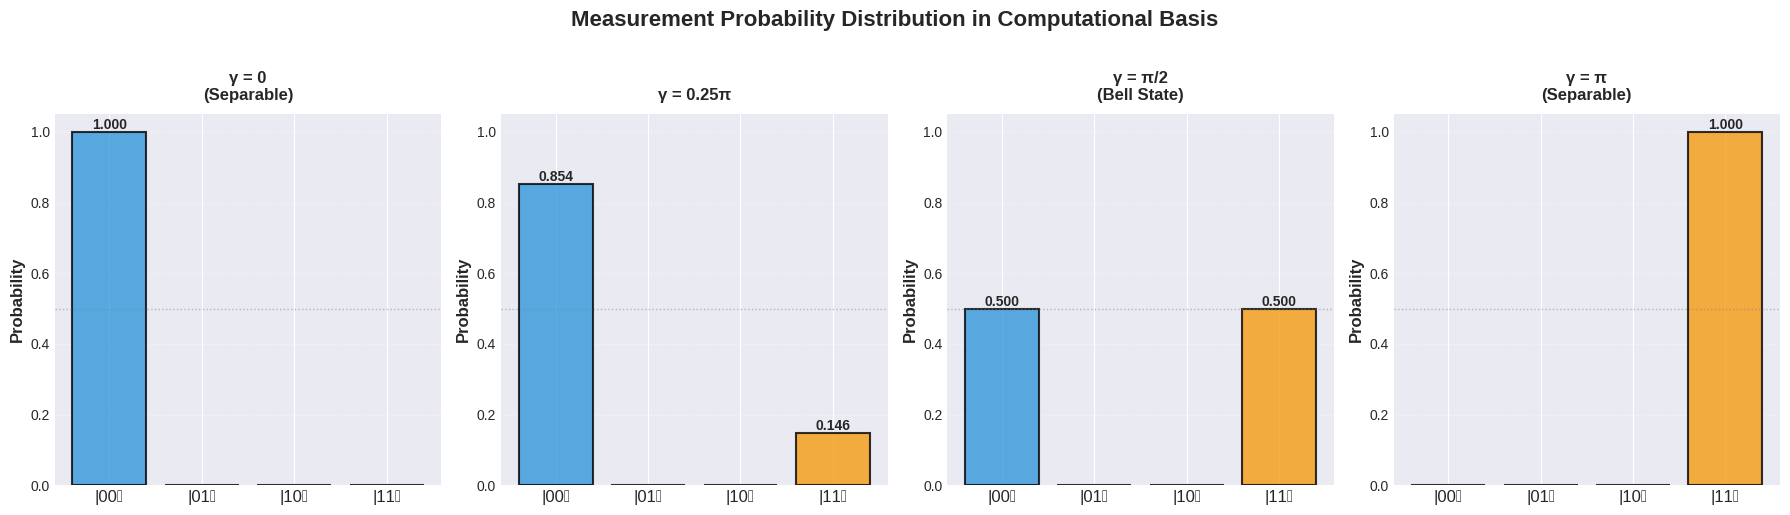


✓ Part 4 Complete: Probability distributions computed!
  - γ = 0: All probability in |00⟩
  - γ = π/2: Equal superposition of |00⟩ and |11⟩ (Bell state)
  - γ = π: All probability in |11⟩


In [6]:
print("\n" + "=" * 80)
print(" PART 4: PROBABILITY DISTRIBUTION ".center(80))
print("=" * 80)
print("\nObjective: Analyze measurement probabilities in computational basis")
print("Basis states: |00⟩, |01⟩, |10⟩, |11⟩\n")

def measure_probabilities(state):
    """
    Get measurement probabilities for computational basis states

    Args:
        state: Quantum state (Statevector)

    Returns:
        array: Probabilities for |00⟩, |01⟩, |10⟩, |11⟩
    """
    return state.probabilities()

# Sample different rotation angles
print("Step 1: Computing probability distributions...")
sample_gammas_prob = [0, np.pi/4, np.pi/2, np.pi]
basis_labels = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for idx, gamma in enumerate(sample_gammas_prob):
    state = create_entangled_state(gamma)
    probs = measure_probabilities(state)

    # Create bar chart
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    bars = axes[idx].bar(range(4), probs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

    # Add value labels on bars
    for bar, prob in zip(bars, probs):
        height = bar.get_height()
        if height > 0.02:  # Only show label if probability is significant
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{prob:.3f}',
                          ha='center', va='bottom', fontsize=10, fontweight='bold')

    axes[idx].set_xticks(range(4))
    axes[idx].set_xticklabels(basis_labels, fontsize=12)
    axes[idx].set_ylabel('Probability', fontsize=12, fontweight='bold')
    axes[idx].set_ylim([0, 1.05])

    # Title with angle
    if gamma == 0:
        title = f'γ = 0\n(Separable)'
    elif gamma == np.pi/2:
        title = f'γ = π/2\n(Bell State)'
    elif gamma == np.pi:
        title = f'γ = π\n(Separable)'
    else:
        title = f'γ = {gamma/np.pi:.2f}π'
    axes[idx].set_title(title, fontsize=12, fontweight='bold', pad=10)

    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    axes[idx].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5, linewidth=1)

    # Print detailed probabilities
    print(f"\n  γ = {gamma:.3f} ({gamma/np.pi:.2f}π):")
    for label, prob in zip(basis_labels, probs):
        print(f"    {label}: {prob:.4f}")
    print(f"    Sum: {np.sum(probs):.4f} ✓")

plt.suptitle('Measurement Probability Distribution in Computational Basis',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('4_probability_distribution.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved figure: 4_probability_distribution.png")
plt.show()

print("\n✓ Part 4 Complete: Probability distributions computed!")
print("  - γ = 0: All probability in |00⟩")
print("  - γ = π/2: Equal superposition of |00⟩ and |11⟩ (Bell state)")
print("  - γ = π: All probability in |11⟩")


# Part 5: Depolarizing Noise Effects

**Objective:** Study how depolarizing noise degrades quantum state fidelity during a swap test.

**Background:**  
Depolarizing noise simulates real quantum hardware decoherence. For a quantum state $\rho$, depolarizing noise acts as:

$$
\rho \rightarrow (1-p)\rho + p \frac{I}{d}
$$

Where:  
- $p$ = depolarizing probability (0 to 1)  
- $I$ = identity matrix  
- $d$ = dimension of the Hilbert space ($d=2^n$ for $n$ qubits)

**Swap Test with Noise:**  
- Swap test measures the overlap between two quantum states $|\psi_1\rangle$ and $|\psi_2\rangle$:  

$$
|\langle \psi_1 | \psi_2 \rangle|^2 = 2 \, P(|0\rangle_{\text{ancilla}}) - 1
$$

- Noise reduces the probability of measuring $|0\rangle$ on the ancilla, decreasing the measured overlap.

**Procedure:**  
1. Build a noise model for single-qubit, two-qubit, and three-qubit gates (CSWAP).  
2. Simulate swap test under different noise probabilities $p = 0.0, 0.01, 0.02, 0.05, 0.1, 0.15$.  
3. Measure overlap for identical states and different pairs of states.  

**Expected Effects:**  
- Identical states ($|\psi_1\rangle = |\psi_2\rangle$) under noise:  

$$
\text{Measured Overlap} < 1 \quad \text{(decreases as $p$ increases)}
$$

- Different states: measured overlaps decrease slightly with noise.  
- Overall, noise reduces **fidelity** of quantum states:

$$
F(\rho_1, \rho_2) = \text{Tr} \sqrt{\sqrt{\rho_1}\rho_2\sqrt{\rho_1}}
$$

**Visualization:**  
1. **Noise vs Overlap Plot:** Shows how overlap of identical states decreases as noise probability $p$ increases.  
2. **Bar Plot for State Pairs:** Compares overlaps **without noise** and **with noise** for all pairs of states.

**Conclusion:**  
- Depolarizing noise lowers overlap measurements in swap tests.  
- Helps simulate realistic quantum hardware errors.  
- Important for benchmarking quantum circuits and fidelity assessment.



                       PART 5: DEPOLARIZING NOISE EFFECTS                       

Objective: Study how noise degrades quantum state fidelity
Method: Apply depolarizing noise to swap test circuit

Step 1: Testing noise effects on swap test...

Noise level → Measured overlap:
  0.000 → 1.0000 (P(|0⟩) = 1.0000)
  0.010 → 0.9641 (P(|0⟩) = 0.9821)
  0.020 → 0.9175 (P(|0⟩) = 0.9587)
  0.050 → 0.8169 (P(|0⟩) = 0.9084)
  0.100 → 0.6501 (P(|0⟩) = 0.8251)
  0.150 → 0.5195 (P(|0⟩) = 0.7598)

Step 2: Testing noise on different state pairs...
  ψ1 vs ψ2: 0.354 → 0.273 (Δ = 0.081)
  ψ1 vs ψ3: 0.432 → 0.362 (Δ = 0.070)
  ψ2 vs ψ3: 0.195 → 0.141 (Δ = 0.054)

Step 3: Creating visualizations...


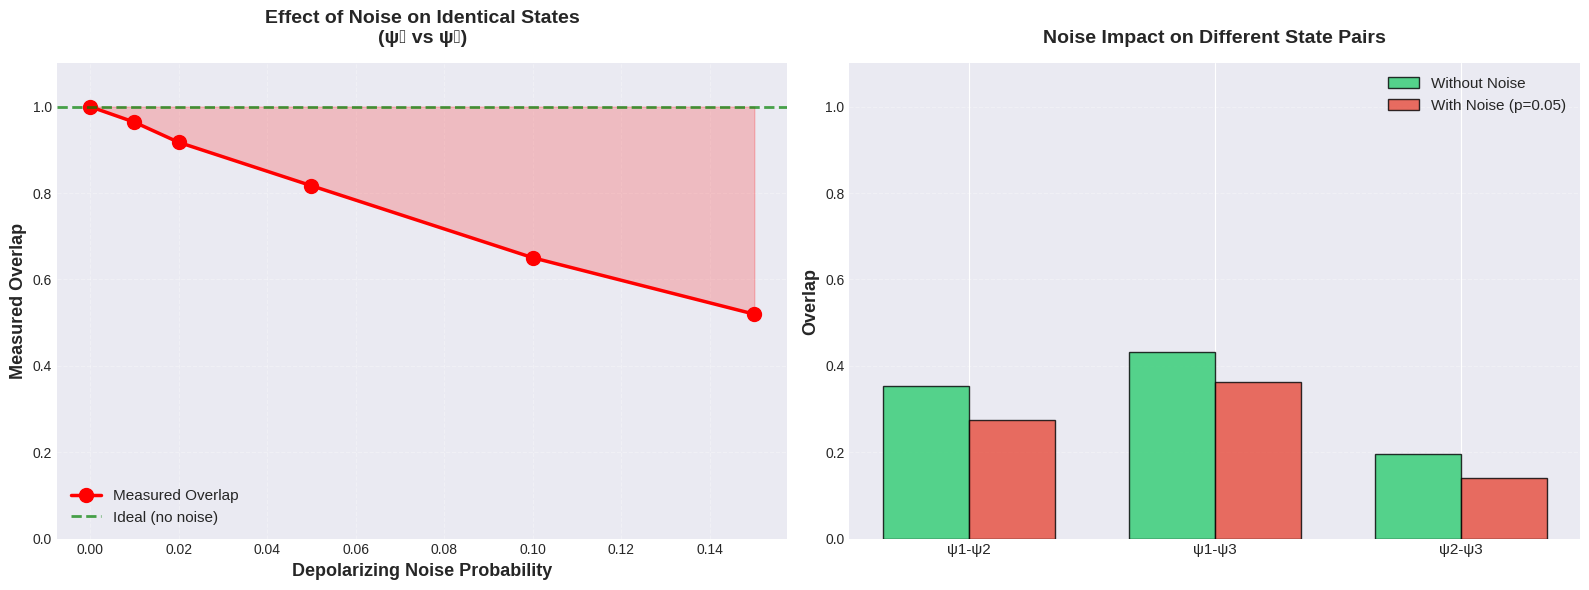

In [9]:
print("\n" + "=" * 80)
print(" PART 5: DEPOLARIZING NOISE EFFECTS ".center(80))
print("=" * 80)
print("\nObjective: Study how noise degrades quantum state fidelity")
print("Method: Apply depolarizing noise to swap test circuit\n")

from qiskit_aer.noise import depolarizing_error, NoiseModel
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: Build noise model for multi-qubit gates ---
def make_noise_model(noise_prob=0.05):
    noise_model = NoiseModel()

    # Single-qubit depolarizing error
    single_error = depolarizing_error(noise_prob, 1)
    noise_model.add_all_qubit_quantum_error(single_error, ['h', 'x', 'y', 'z', 'rx', 'ry', 'rz'])

    # Two-qubit depolarizing error
    two_error = depolarizing_error(noise_prob, 2)
    noise_model.add_all_qubit_quantum_error(two_error, ['cx'])

    # Three-qubit depolarizing error for cswap
    three_error = depolarizing_error(noise_prob, 3)
    noise_model.add_all_qubit_quantum_error(three_error, ['cswap'])

    return noise_model

# --- Swap test with noise ---
def swap_test_with_noise(state1, state2, noise_prob=0.05, shots=8192):
    """
    Perform swap test with depolarizing noise model
    """
    qc = swap_test_circuit(state1, state2)  # Your swap_test_circuit from earlier

    # Create simulator with noise
    noise_model = make_noise_model(noise_prob)
    simulator = AerSimulator(noise_model=noise_model)

    # Run simulation
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Calculate overlap
    p0 = counts.get('0', 0) / shots
    overlap = max(0.0, 2*p0 - 1)

    return overlap, counts

# --- Test noise effects on identical states ---
print("Step 1: Testing noise effects on swap test...")
noise_levels = [0.0, 0.01, 0.02, 0.05, 0.1, 0.15]
state1 = states[0]
state2 = states[0]  # Same state - should give overlap = 1 without noise

overlaps_vs_noise = []
p0_values = []

print("\nNoise level → Measured overlap:")
for noise in noise_levels:
    overlap, counts = swap_test_with_noise(state1, state2, noise_prob=noise)
    p0 = counts.get('0', 0) / sum(counts.values())
    overlaps_vs_noise.append(overlap)
    p0_values.append(p0)
    print(f"  {noise:.3f} → {overlap:.4f} (P(|0⟩) = {p0:.4f})")

# --- Test on different state pairs with fixed noise ---
print("\nStep 2: Testing noise on different state pairs...")
noise_fixed = 0.05
overlap_no_noise = []
overlap_with_noise = []

state_labels = [f'ψ{i+1}' for i in range(len(states))]

for i in range(len(states)-1):
    for j in range(i+1, len(states)):
        # Without noise
        ov_clean = compute_overlap(states[i], states[j])  # Your earlier function
        # With noise
        ov_noisy, _ = swap_test_with_noise(states[i], states[j], noise_prob=noise_fixed)

        overlap_no_noise.append(ov_clean)
        overlap_with_noise.append(ov_noisy)

        print(f"  {state_labels[i]} vs {state_labels[j]}: {ov_clean:.3f} → {ov_noisy:.3f} (Δ = {ov_clean-ov_noisy:.3f})")

# --- Step 3: Visualization ---
print("\nStep 3: Creating visualizations...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Noise effect on identical states
ax1.plot(noise_levels, overlaps_vs_noise, 'ro-', linewidth=2.5, markersize=10,
         label='Measured Overlap')
ax1.axhline(y=1.0, color='g', linestyle='--', linewidth=2, alpha=0.7, label='Ideal (no noise)')
ax1.fill_between(noise_levels, overlaps_vs_noise, 1, alpha=0.2, color='red')
ax1.set_xlabel('Depolarizing Noise Probability', fontsize=13, fontweight='bold')
ax1.set_ylabel('Measured Overlap', fontsize=13, fontweight='bold')
ax1.set_title('Effect of Noise on Identical States\n(ψ₁ vs ψ₁)',
              fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11, loc='lower left')
ax1.set_ylim([0, 1.1])

# Plot 2: Comparison of clean vs noisy for different state pairs
x_pos = np.arange(len(overlap_no_noise))
width = 0.35
ax2.bar(x_pos - width/2, overlap_no_noise, width, label='Without Noise',
        color='#2ecc71', alpha=0.8, edgecolor='black')
ax2.bar(x_pos + width/2, overlap_with_noise, width, label=f'With Noise (p={noise_fixed})',
        color='#e74c3c', alpha=0.8, edgecolor='black')

pair_labels = [f'{state_labels[i]}-{state_labels[j]}'
               for i in range(len(states)-1) for j in range(i+1, len(states))]
ax2.set_xticks(x_pos)
ax2.set_xticklabels(pair_labels, fontsize=11)
ax2.set_ylabel('Overlap', fontsize=13, fontweight='bold')
ax2.set_title('Noise Impact on Different State Pairs', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()
